# Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

A **support vector machine (SVM)** is another Machine learning model, capable of 

* linear or non-linear classification
* regression
* outlier detection

It is one of the most popular machine learning models, and is well suited for *complicated small or medium sized datasets.*

# Linear SVM Classification

You can think of an SVM classifier as fitting the widdest possible street (parallel dashed lines) between various classes. This is called **large margin classification**. 

* The solid line on the right plot is called the **decision boundary**. It seperates the two classes and stays as far away as possible from the closest training instances.

* The dashed lines on the right plot give the boundaries of the street. They are fully determined (or "supported") by the instances located on the edge of the street. These instances are called **support vectors**.

![](chap5pic1.png)

Note that this only works if the data is linearly seperable. If not, then a hyperparameter $C$ should be used; it makesa trade-off between street size and margin violations

![](chap5pic2.png)

Although the first one makes more margin violations, chances are it will generalize better.

Lets obtain the iris dataset from before.

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris['data'][:,2::]
y = (iris['target'] == 2).astype(np.float64) # now include all 3 plants

Use SVM classification

In [3]:
svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=1, loss='hinge'))
    ))
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Function for plotting.

In [4]:
def plot_predictions(clf, lims):
    # Arrays of points we want to predict
    x0s = np.linspace(lims[0], lims[1], 100)
    x1s = np.linspace(lims[2], lims[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.colorbar()

## "Wide Street" C=1

Note that positive values are identified as the class but negative values aren't.

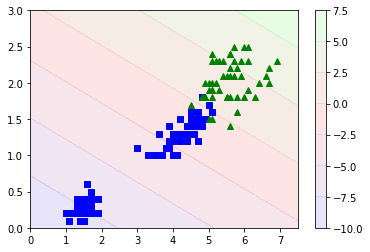

In [5]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(svm_clf, [0, 7.5, 0, 3])

## "Narrow Street" C=100

In [6]:
svm_clf = Pipeline((
        ('scaler', StandardScaler()),
        ('linear_svc', LinearSVC(C=100, loss='hinge'))
    ))
svm_clf.fit(X,y)

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

## C=100 Plot

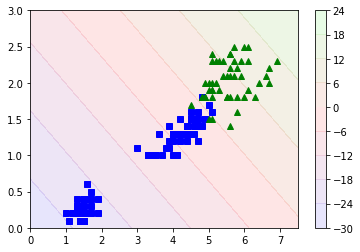

In [7]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(svm_clf, [0, 7.5, 0, 3])

Notice that the contours change as we require the street to be narrower. While $C=100$ might do better for the training set, it is likely "overfitting" the data; $C=1$ makes more errors but will probably generalize better.

# Non-Linear SVM Classification

Sometimes the data isn't linear seperable and we need more complicated deicsion boundaries. Consider the data set below.

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

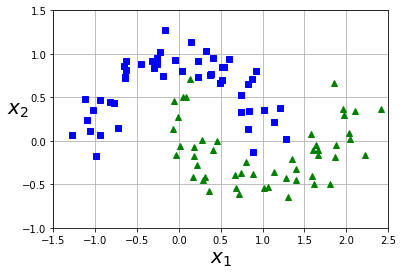

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

We can add more polynomial features to this data set before training the SVM classifier. Now in addition to just $x_1$ and $x_2$, we also have $1$, $x_1^2$, $x_2^2$, $x_1x_2$, $x_1x_2^2$, $x_1^2x_2$, $x_1^3$, $x_2^3$.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

While the boundary is linear in the 10-dimensional space of all the parameters, when it is moved back into $x_1$ and $x_2$ space, it has an interesting shape. Once again, positive entries are identified as one class and negative the other.

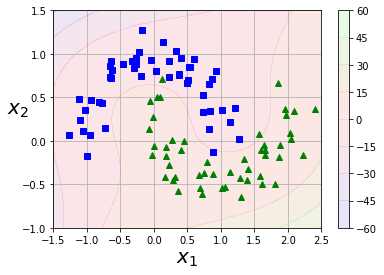

In [11]:
def plot_predictions(clf, axes):
    # Arrays of points we want to predict
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    #plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.colorbar()

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Polynomial Kernel

* For very complicated datasets, a low polynomial degree can't deal with complex features
* A high polynomial degree creates a huge number of features, making the model slow to run

There is something called the **kernel trick** which allows one to get the same result as if they added many polynomial features, but without actually having to add them. This trick is implemented by the SVC class. Note that

* $C$ controls the boundary overlap
* degree is the dimension of the polynomial
* coef0  controls how influenced the model is by high degree polynomials

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf_deg3 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
    ))
poly_kernel_svm_clf_deg10 = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
    ))

poly_kernel_svm_clf_deg3.fit(X,y)
poly_kernel_svm_clf_deg10.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Plot the predictions of our two different models.

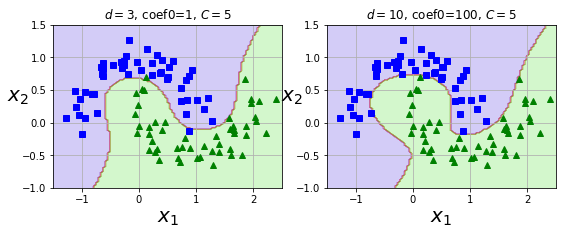

In [13]:
def plot_predictions(clf, lims):
    # Arrays of points we want to predict
    x0s = np.linspace(lims[0], lims[1], 100)
    x1s = np.linspace(lims[2], lims[3], 100)
    # Form into meshgrid
    x0, x1 = np.meshgrid(x0s, x1s)
    # Form into array where each element is (x1,x2)
    X = np.c_[x0.ravel(), x1.ravel()]
    # Make predictions based on data
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plt.figure(figsize=(9, 3))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf_deg3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$d=3$, coef0=1, $C=5$')

plt.subplot(122)
plot_predictions(poly_kernel_svm_clf_deg10, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$d=10$, coef0=100, $C=5$')

plt.show()

## Similarity Features

While adding additional polynomials such as $x_1x_2$, $x_2^3x_1^5$, etc.. to each data point is one way of generating extra features, another way is using a **similarity function** that determines how much each instance resembles a particular landmark. For this we use the *Gaussian Radial Bases Function*:

$$\phi_{\gamma}(\mathbf{x}, l)=e^{-\gamma|\mathbf{x}-l|^2} $$

where $\mathbf{x}$ is some data point (can be multidimensional) $l$ is the location of the landmark in data-space and $\gamma$ is a scaling factor.

The kernel trick can be used again to obtain many similarity features for a particular data set. In this particular method, a landmark is placed at every data point.

In [15]:
rbf_kernel_svm_clf1 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.001))
    ])
rbf_kernel_svm_clf2 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=1000))
    ])
rbf_kernel_svm_clf3 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf4 = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=1000))
    ])

rbf_kernel_svm_clf1.fit(X, y)
rbf_kernel_svm_clf2.fit(X, y)
rbf_kernel_svm_clf3.fit(X, y)
rbf_kernel_svm_clf4.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

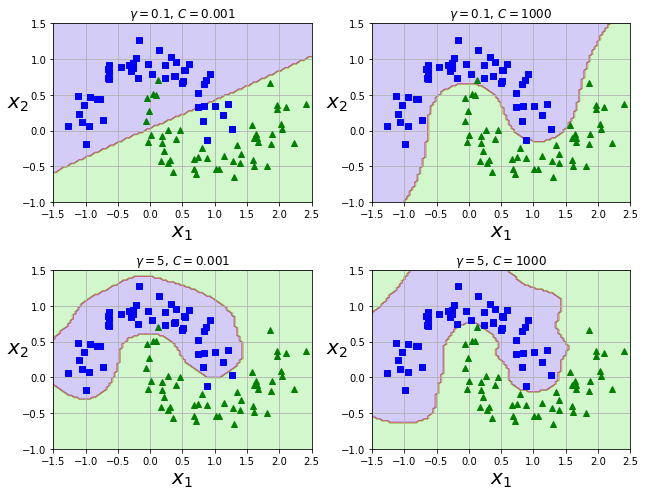

In [20]:
plt.figure(figsize=(9, 7))
plt.subplot(221)
plot_predictions(rbf_kernel_svm_clf1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=0.1$, $C=0.001$')

plt.subplot(222)
plot_predictions(rbf_kernel_svm_clf2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=0.1$, $C=1000$')

plt.subplot(223)
plot_predictions(rbf_kernel_svm_clf3, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=5$, $C=0.001$')

plt.subplot(224)
plot_predictions(rbf_kernel_svm_clf4, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('$\gamma=5$, $C=1000$')

plt.tight_layout()
plt.show()

As a general rule:

* **If the model is overfitting** then reduce $\gamma$ and reduce $C$. A large value of $\gamma$ corresponds to a narrow bell-shaped curve where each instance has a smaller range of influence, so the decision boundary is irregular and ends up wiggling around individual instances.

* **If the model is underfitting** then increase $\gamma$ and increase $C$. A small value of $\gamma$ corresponds to a wide bell-shaped curve where each instance has a larger range of influence. As $\gamma \to 0$ all instances have the same parameter, and the similarity features do nothing (so increase to get more effect).